# Classifieur de Spam

lien du brief : https://simplonline.co/briefs/97a4822f-8af0-4607-86b3-83dbfdd05d5e 

## Descriptif de Simplonline

#### Contexte :

Concevoir un classifieur de détection automatique de SPAM.

La collection SMS Spam est un ensemble de messages SMS marqués qui ont été collectés pour la recherche sur les SMS Spam. Elle contient un ensemble de messages SMS en anglais de 5 574 messages, étiquetés selon qu'ils sont ham (légitimes) ou spam.
Je vous encourage à vous documenter sur les caractéristiques type des spam et de développer votre stratégie de préparation des données dans ce sens.

En tant que développeur IA, voici les missions :
- Analyse du besoin
- Construction d'un pipeline de ML
- Prétraitement des données
- Entrainement, fine tuning, validation et sélection d'un modèle de classification

Les fichiers contiennent un message par ligne. Chaque ligne est composée de deux colonnes : v1 contient le label (ham ou spam) et v2 contient le texte brut.

liens :

dataset : https://github.com/remijul/dataset/blob/master/SMSSpamCollection

informations : https://archive.ics.uci.edu/dataset/228/sms+spam+collection 

#### Critères de performance :

- compréhension du jeux de données
- capacité à préparer les données
- performance des modèles de prédiction
- capacité à apporter une solution dans le temps imparti
- rédaction du notebook
- qualité du synthèse du travail

#### Livrables :

* créer un/des notebook reproductible, commenté, expliqué (IMPORTANT !)
* créer un repo git et un espace sur github/gitlab pour le projet (code refactorisé)
* faire une présentation (slides) qui explique votre démarche et les résultats obtenus avec :
- un document technique qui explique l'outil
- la procédure suivie pour préparer les données et le preprocessing
- la procédure suivie pour trouver un modèle adapté
- le modèle d'IA sélectionné

BONUS :
* Application streamlit qui fait de la prédiction en temps réel d'un message déposé par l'utilisateur


### Analyse du contexte 

#### D'où viennent les données : Par qui ? Pour quoi ? Comment ?


SMS Spam Collection est un ensemble public de messages étiquetés par SMS qui ont été collectés pour la recherche sur le spam pour les téléphones portables.

##### Instances = 5574

##### Informations supplémentaires

Ce corpus a été collecté à partir de sources de recherche gratuites ou gratuites sur Internet:

Une collection de 425 messages de spam par SMS a été extraite manuellement du site Web de Grumbletext. Il s'agit d'un forum britannique dans lequel les utilisateurs de téléphones portables font des déclarations publiques sur les SMS spam, la plupart d'entre eux sans signaler le message de spam reçu. L'identification du texte des messages de spam dans les revendications est une tâche très difficile et longue, et il a consisté à numériser soigneusement des centaines de pages Web. Le site Web de Grumbletext est le suivant: http://www.grumbletext.co.uk/.
Un sous-ensemble de 3 375 SMS choisis au hasard par jambon du NUS SMS Corpus (NSC), qui est un ensemble de données d'environ 10 000 messages légitimes collectés pour la recherche au Département de l'informatique de l'Université nationale de Singapour. Les messages proviennent en grande partie de Singapouriens et principalement d'étudiants fréquentant l'Université. Ces messages ont été recueillis auprès de volontaires qui ont été informés que leurs contributions allaient être rendues publiques. Le NUS SMS Corpus est disponible à l'adresse suivante: http://www.comp.nus.edu.sg/.rpnlpir/downloads/corpora/smsCorpus/.
Une liste de 450 SMS de type jambon collectés sur la thèse de doctorat de Caroline Tag disponible à l'adresse http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf.
Enfin, nous avons incorporé le SMS Spam Corpus v.0.1 Big. Il contient 1 002 messages de mja SMS et 322 messages de spam et il est disponible en public à l'adresse suivante: http://www.esp.uem.es/jmgomez/smsspamcorpus/. Ce corpus a été utilisé dans les recherches universitaires suivantes:

1 G-3mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero Garcia, F. Filtration par SMS basée sur le contenu. Actes du Colloque 2006 de l'ACM sur l'ingénierie des documents (ACM DOCENG'06), Amsterdam (Pays-Bas), 10-13, 2006.

Cormack, G. V., G-3mez Hidalgo, J. M., et Puertas Sonz, E. Ingénierie technique pour filtrage de spam mobile (SMS).  Actes de la trentième Conférence internationale annuelle de la CMA sur la recherche et le développement dans la recherche et le développement dans le domaine de la recherche et de l'information (ACM SIGIR'07), New York, NY, 871-872, 2007.

3 Cormack, G. V., G-3mez Hidalgo, J. M., et Puertas Sonz, E. Filtration de spam pour les messages courts. Actes de la seizième Conférence de l'ACM sur la gestion de l'information et des connaissances (ACM CIKM'07). Lisbonne, Portugal, 313-320, 2007.

##### Des valeurs manquantes ont-elles été des valeurs?

Non



#### A quoi on reconnait un Spam ?

- Généralement, les messages malveillants sont envoyés à destination d'un grand nombre de cibles, ils ne sont pas ou peu personnalisés.

- Le message évoque un dossier, une facture, un thème qui ne vous parle pas ? Il s'agit certainement d'un courriel malveillant.

(source : https://www.economie.gouv.fr/entreprises/comment-lutter-contre-spams)

#### Comment faire pour reconnaitre un Spam à partir d'un texte ? (hypotèse de travail)

rechercher dans le texte brut :
- des mots clé comme : 'URGENT!', 'Quiz!', 'YOU!', 'Txt:', 'now!', 'Call ', 'Win', 'WINNER', '!!', 
- des montions à de l'argent
- des numéros de téléphone
- des e-mails
- des liens
- utilisation de mot en majuscule

## Importation des modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

## Amélioration du prétraitement et du model


refaire le preprocessing et la modelisation avec une pipeline pour être plus efficace

préparation du nettoyage des données:

In [2]:
def taitement_na_duplic (df) :
    """
    entrée : un data frame
    sortie : 2 data frame = 'principal' et 'na'
    ---------------------------
    je regarde dans le df d'entré et regarde si il y a des na
    si oui colone 1  => j'ajoute la ligne à un df de sorti 'na' et suprime du df de sortie principal
    si oui colone 2  => je suprime la ligne du df de sortie principal
    """
    df_na = None
    df = df.drop_duplicates()
    
    if df['classification'].isna().any() == True :
        df_na = df.loc[df['classification'].isna()]
        
    if df['sms'].isna().any() == True :
        df.drop(df[df['sms'].isna() == True].index, inplace=True)
    
    return df, df_na

préparation de l'encodage :

In [3]:
def mot_cle_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    j'ai une liste de mots clés
    je crée le pattern des mots clés
    je recherche dans la colonne 'sms' si je trouve le pattern  
    """
    mot_cles = ['URGENT!', 'Quiz!', 'YOU!', 'Txt:', 'now!', 'Call ', 'Win', 'WINNER', '!!', 'For sale', 'FREE!', 'PRIVATE!', 'Account', 'Latest News!']
    pattern = re.compile(r"(?=("+'|'.join(mot_cles)+r"))", re.IGNORECASE)
    match = re.findall(pattern, sms)
    return bool(match)

In [4]:
def argent_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    j'ai une liste de mots clés
    je crée le pattern des mots clés
    je recherche dans la colonne 'sms' si je trouve le pattern  
    """
    mot_cles = ['£', '€', '\$']
    pattern = re.compile(r"(?=("+'|'.join(mot_cles)+r"))", re.IGNORECASE)
    match = re.findall(pattern, sms)
    return bool(match)

In [5]:
def telephone_posible (string) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    crée le pattern des numero de tel
    je recherche dans une chaine de caractère si je trouve le pattern    
    """
    pattern = re.compile(r"(\+\d{1,3})?\s?\(?\d{1,4}\)?[\s.-]?\d{1,4}[\s.-]?\d{1,4}")
    match = re.search(pattern, string)
    if match:
        return True
    return False

In [6]:
def email_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    je crée le pattern des e-mails
    je recherche dans la colonne 'sms' si je trouve le pattern    
    """
    pattern = r"([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+"
    match = re.findall(pattern, sms)
    return bool(match)

In [7]:
def lien_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    j'ai une liste de mots clés
    je crée le pattern des mots clés
    je recherche dans la colonne 'sms' si je trouve le pattern  
    """
    mot_cles = ['http', 'https', 'www.', 'click here']
    pattern = re.compile(r"(?=("+'|'.join(mot_cles)+r"))", re.IGNORECASE)
    match = re.findall(pattern, sms)
    return bool(match)

In [8]:
def mot_maj_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : boolean
    ---------------------
    je crée le pattern des majuscules
    je recherche dans la colonne 'sms' si je trouve le pattern  
    """
    pattern = "[A-Z]{3}"
    match = re.findall(pattern, sms)
    return bool(match)

In [9]:
def long_posible (sms) :
    """
    entrée : chaine de caractère
    sortie : int
    ---------------------
    je mesure la taille de chaque ligne de la colonne 'sms'
    """
    return int(len(sms))

In [10]:
def encodage_df (df) :
    """
    entrée : un data frame
    sortie : un data frame
    ---------------------------
    je lance l'encodage de la colonne 'classification'
    je crée la colonne 'mot_cles' grâce à la fonction 'mot_cle_posible'
    je crée la colonne 'argent' grâce à la fonction 'argent_posible'
    je crée la colonne 'telephone' grâce à la fonction 'telephone_posible'
    je crée la colonne 'email' grâce à la fonction 'email_posible'
    je crée la colonne 'lien' grâce à la fonction 'lien_posible'
    je crée la colonne 'maj' grâce à la fonction 'mot_maj_posible'
    je crée la colonne 'long' grâce à la fonction 'long_posible'
    je lance l'encodage de toutes ces colonnes
    """
    label_encod = LabelEncoder()
    df['classification'] = label_encod.fit_transform(df['classification'])
    
    df['mot_cles'] = df['sms'].apply(mot_cle_posible)
    df['argent'] = df['sms'].apply(argent_posible)
    df['telephone'] = df['sms'].apply(telephone_posible)
    df['email'] = df['sms'].apply(email_posible)
    df['lien'] = df['sms'].apply(lien_posible)
    df['maj'] = df['sms'].apply(mot_maj_posible)
    df['long'] = df['sms'].apply(long_posible)
    
    df['mot_cles'] = label_encod.fit_transform(df['mot_cles'])
    df['argent'] = label_encod.fit_transform(df['argent'])
    df['telephone'] = label_encod.fit_transform(df['telephone'])
    df['email'] = label_encod.fit_transform(df['email'])
    df['maj'] = label_encod.fit_transform(df['maj'])
    df['lien'] = label_encod.fit_transform(df['lien'])

    return df

préparation a la création des fitures et targets :

In [11]:
def traine_et_test (df) :
    """
    entrée : un data frame, pourcentage de valeur à mettre dans df_test
    sortie : 2 data frame = 'train' et 'test' et leurs x et y respectif
    ---------------------------
    avec train_test_split, je sépare en 2 le df : trainSet et  testSet
    je crée le y_train
    je crée le y_test
    je crée le x_train
    je crée le x_test
    """
    trainSet, testSet = train_test_split(df, test_size=0.2, random_state=0, stratify=df['classification'])

    trainSet.drop('sms', axis=1, inplace=True)
    testSet.drop('sms', axis=1, inplace=True)

    y_train = trainSet['classification']

    y_test = testSet['classification']

    x_train = trainSet[['mot_cles', 'argent', 'telephone', 'email', 'lien', 'maj', 'long']]

    x_test = testSet[['mot_cles', 'argent', 'telephone', 'email', 'lien', 'maj', 'long']]

    return trainSet, x_train, y_train, testSet, x_test, y_test

la fonction qui fait le pré-processing :

In [12]:
def preprocessing_df (df):
    """
    entrée : un data frame
    sortie : 4 data frame et les fitures et tagets
    ---------------------------
    je lance le nettoyage des données grâce à la fonction taitement_na_duplic
    je lance l'encodage des données grâce à la fonction encodage_df
    je lance la création des fitures et targets grâce à la fonction traine_et_test
    """
    df_na = None
    df, df_na = taitement_na_duplic(df)
    df = encodage_df(df)
    trainSet, x_train, y_train, testSet, x_test, y_test = traine_et_test(df)
    
    return df, df_na, trainSet, x_train, y_train, testSet, x_test, y_test

In [13]:
def model_evaluation (model, df) :
    """
    entrée : un data frame, pourcentage de valeur à mettre dans df_test
    sortie : 2 data frame = 'traine' et 'test'
    ---------------------------
    avec train_test_split, je sépare en 2 le df
    pourcent est le pourcentage de valeur à mettre dans df_test
    """
    df, df_na, trainSet, x_train, y_train, testSet, x_test, y_test = preprocessing_df(df)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    print ('score = ', score)
    print ('confusion_matrix = \n', confusion_matrix(y_test, y_pred))
    print ('classification_report = \n', classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, x_train, y_train, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [14]:
pd.set_option('mode.chained_assignment', None)
df_amelior = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/SMSSpamCollection', 
                 sep='\t',on_bad_lines='skip', header=None)
df_amelior.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df_amelior.rename(columns={0:'classification'}, inplace=True)
df_amelior.rename(columns={1:'sms'}, inplace=True)
df_amelior.head()


,classification,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


score =  0.9671179883945842
confusion_matrix = 
 [[887  16]
 [ 18 113]]
classification_report = 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       903
           1       0.88      0.86      0.87       131

    accuracy                           0.97      1034
   macro avg       0.93      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\

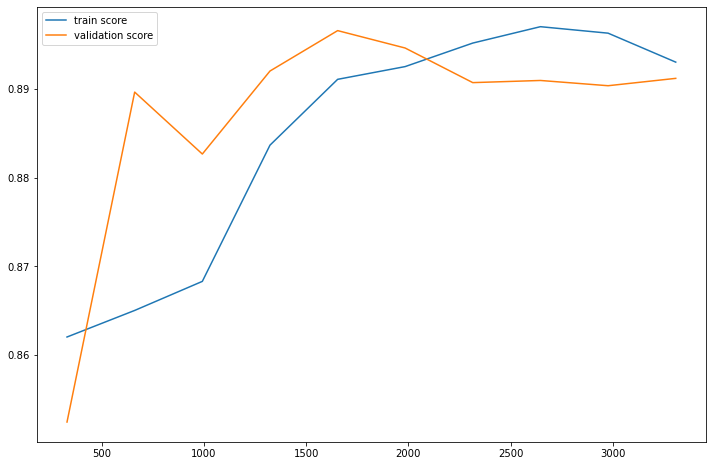

In [16]:
model_multi_NB = make_pipeline( SelectKBest(f_classif, k=6),
                                MultinomialNB (force_alpha=True) )
model_evaluation(model_multi_NB, df_amelior)


score =  0.9748549323017408
confusion_matrix = 
 [[890  13]
 [ 13 118]]
classification_report = 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.90      0.90      0.90       131

    accuracy                           0.97      1034
   macro avg       0.94      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, 

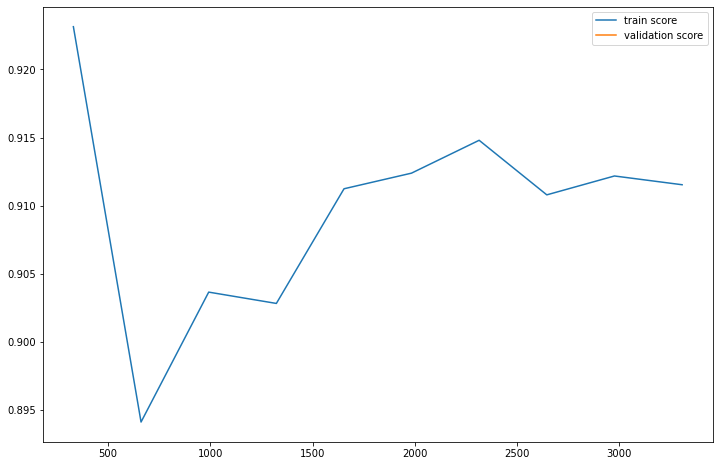

In [17]:
model_cat_NB = make_pipeline( SelectKBest(f_classif, k=6),
                                CategoricalNB(force_alpha=True) ) 
model_evaluation(model_cat_NB, df_amelior)


score =  0.965183752417795
confusion_matrix = 
 [[896   7]
 [ 29 102]]
classification_report = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.94      0.78      0.85       131

    accuracy                           0.97      1034
   macro avg       0.95      0.89      0.92      1034
weighted avg       0.96      0.97      0.96      1034



C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\

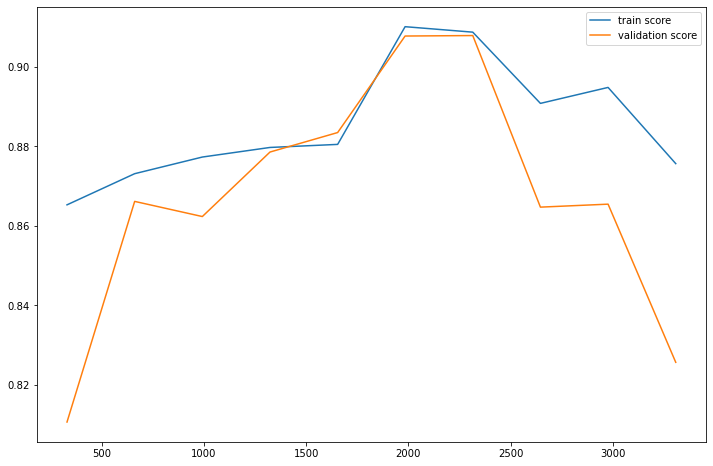

In [18]:
momdel_KNN =  make_pipeline( SelectKBest(f_classif, k=5),
                                KNeighborsClassifier(n_neighbors=5) )
model_evaluation(momdel_KNN, df_amelior)

score =  0.9642166344294004
confusion_matrix = 
 [[898   5]
 [ 32  99]]
classification_report = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.95      0.76      0.84       131

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034



C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\

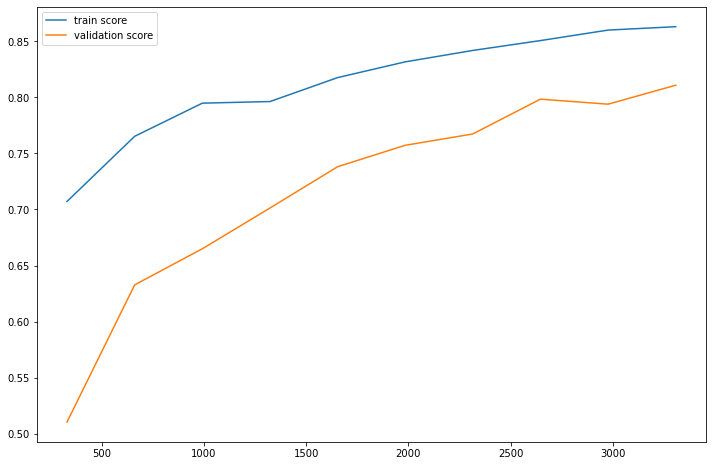

In [19]:
momdel_KNN =  make_pipeline( SelectKBest(f_classif, k=6),
                                KNeighborsClassifier(n_neighbors=5) )
model_evaluation(momdel_KNN, df_amelior)

score =  0.9709864603481625
confusion_matrix = 
 [[889  14]
 [ 16 115]]
classification_report = 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       903
           1       0.89      0.88      0.88       131

    accuracy                           0.97      1034
   macro avg       0.94      0.93      0.93      1034
weighted avg       0.97      0.97      0.97      1034



C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\naouf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\

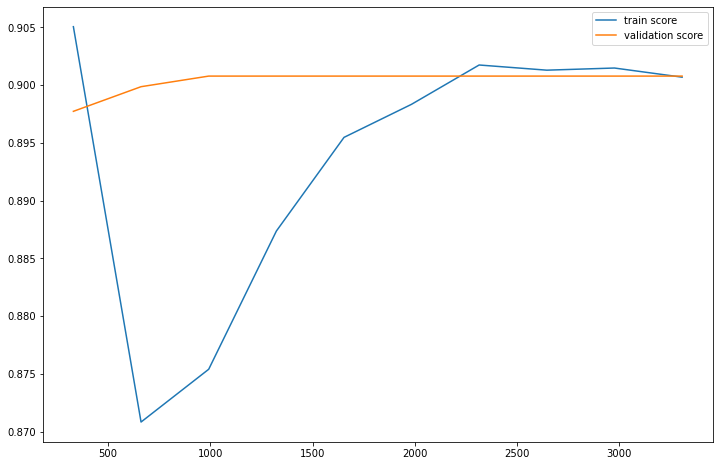

In [20]:
momdel_lin_svc =  make_pipeline( SelectKBest(f_classif, k=6),
                                LinearSVC(dual='auto', random_state=0, tol=1e-05) )
model_evaluation(momdel_lin_svc, df_amelior)